<a href="https://colab.research.google.com/github/Ranjankraj/Shala/blob/main/ML_L5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

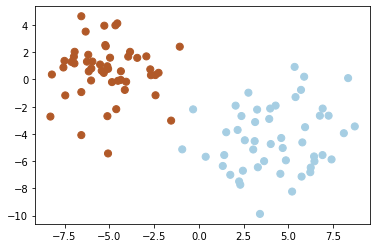

In [30]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=123, cluster_std=2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap=plt.cm.Paired)

In [28]:
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

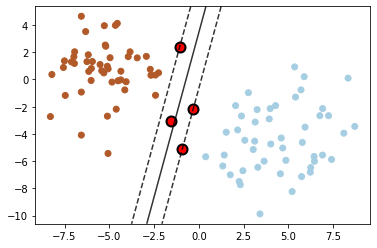

In [29]:


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 10)
yy = np.linspace(ylim[0], ylim[1], 10)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:,1], s=100, linewidth=2, facecolors='r', edgecolors='k')

plt.show()

In [32]:
clf.support_vectors_

array([[-0.31681699, -2.19775912],
       [-0.92397477, -5.13503856],
       [-1.54414824, -3.02379614],
       [-1.06156673,  2.40288924]])

In [33]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

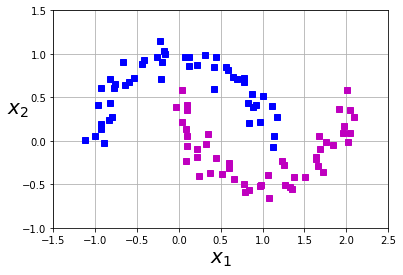

In [35]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1, random_state=123)

#define a function to plot the dataset
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ms")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

#Let's have a look at the data we have generated
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()



In [36]:
def plot_predictions(clf, axes):
    #create data in continous linear space
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [38]:
model = SVC(kernel='poly', degree=3, coef0=1, C=5)
model.fit(X,y)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

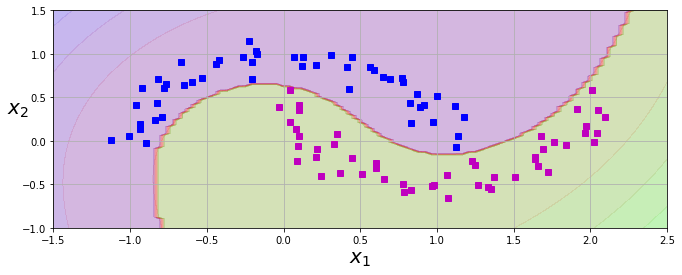

In [40]:
#plot the decision boundaries
plt.figure(figsize=(11, 4))

#plot the decision boundaries
plot_predictions(model, [-1.5, 2.5, -1, 1.5])

#plot the dataset
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

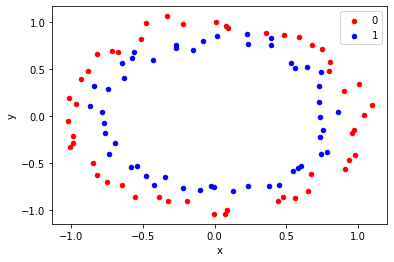

In [42]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [43]:
model = SVC(kernel='rbf', C=1, gamma=2)
model.fit(X,y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

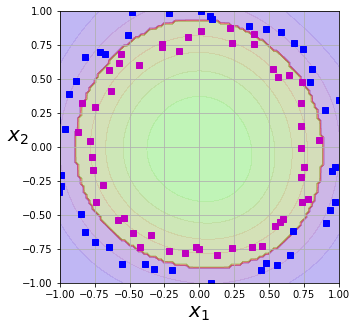

In [44]:
plt.figure(figsize=(5, 5))

#plot the decision boundaries
plot_predictions(model, [-1.0, 1.0, -1, 1.0])

#plot the dataset
plot_dataset(X, y, [-1.0, 1.0, -1, 1.0])
plt.show()